In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Mall_Customers.csv", sep=",")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Stworzyć histogramy dla wieku, rocznego dochodu i oceny wydawania.

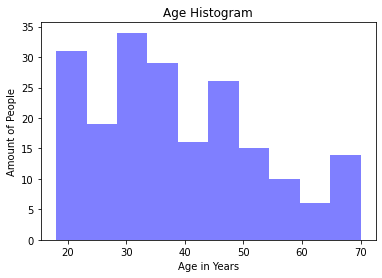

In [3]:
plt.hist(data["Age"], facecolor='blue', alpha=0.5)
plt.title("Age Histogram")
plt.xlabel('Age in Years')
plt.ylabel('Amount of People')
plt.show()

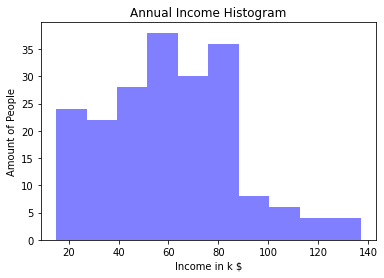

In [7]:
plt.hist(data["Annual Income (k$)"], facecolor='blue', alpha=0.5)
plt.title("Annual Income Histogram")
plt.xlabel('Income in k $')
plt.ylabel('Amount of People')

plt.show()

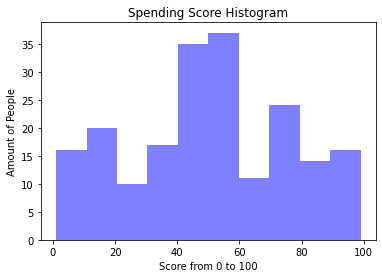

In [8]:
plt.hist(data["Spending Score (1-100)"], facecolor='blue', alpha=0.5)
plt.title("Spending Score Histogram")
plt.xlabel('Score from 0 to 100')
plt.ylabel('Amount of People')
plt.show()

# Porównać na wykresie liczbę kobiet i mężczyzn.

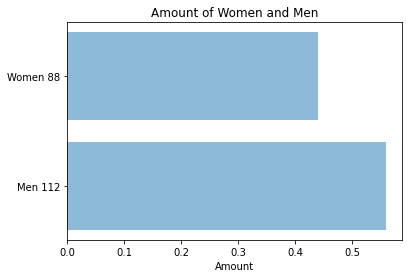

In [4]:
amount_of_women = len(list(filter(lambda x: x == "Male", data["Gender"] )))
amount_of_men = len(list(filter(lambda x: x == "Female", data["Gender"] )))
amount = len(data["Gender"])
# dwa razy sprawdzam ze wzgledu ze moze byc cos innego niz Male lub Female 
objects = ('Men ' + str(amount_of_men), 'Women ' + str(amount_of_women))
y_pos = np.arange(len(objects))
performance = [amount_of_men/amount, amount_of_women/amount]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Amount')
plt.title('Amount of Women and Men')

plt.show()

# Przedstawić na wykresie zależności pomiędzy wiekiem, rocznym
# dochodem i oceną wydawania (6 wykresów np. wiek i dochody, wiek i
# ocena wydawania itd.).

In [5]:
titleDict = {'fontsize': 20,'weight':'bold'}

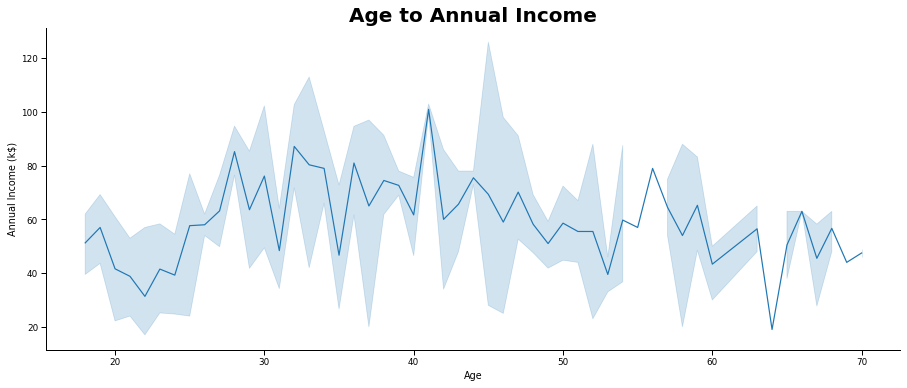

In [11]:
sns.set_context('paper')
sns.relplot(data=data,
            x="Age",
            y="Annual Income (k$)",
            aspect=2.5, 
            kind='line')
plt.title("Age to Annual Income", fontdict=titleDict)
plt.show()

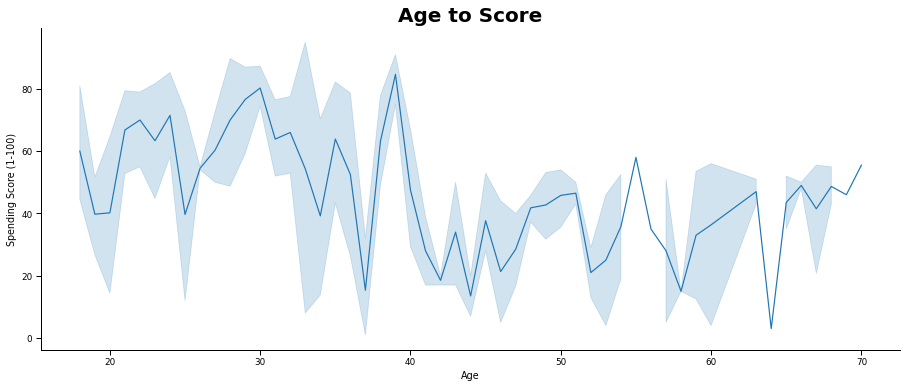

In [12]:
sns.set_context('paper')
sns.relplot(data=data,
            x="Age",
            y="Spending Score (1-100)",
            aspect=2.5, 
            kind='line')
plt.title("Age to Score", fontdict=titleDict)
plt.show()

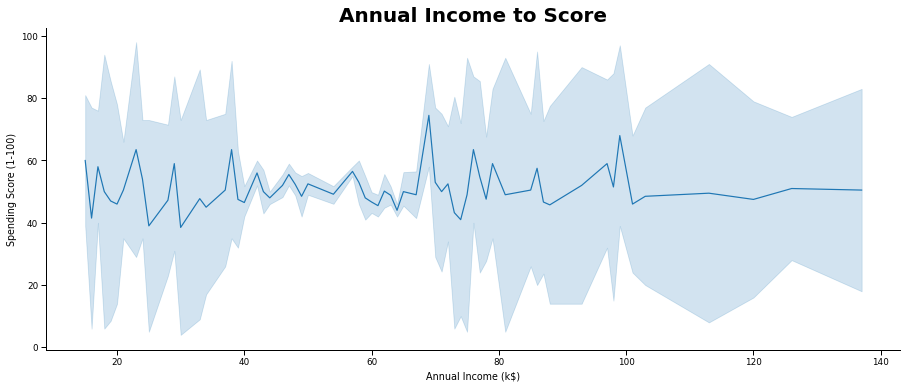

In [13]:
sns.set_context('paper')
sns.relplot(data=data,
            x="Annual Income (k$)",
            y="Spending Score (1-100)",
            aspect=2.5, 
            kind='line')
plt.title("Annual Income to Score", fontdict=titleDict)
plt.show()

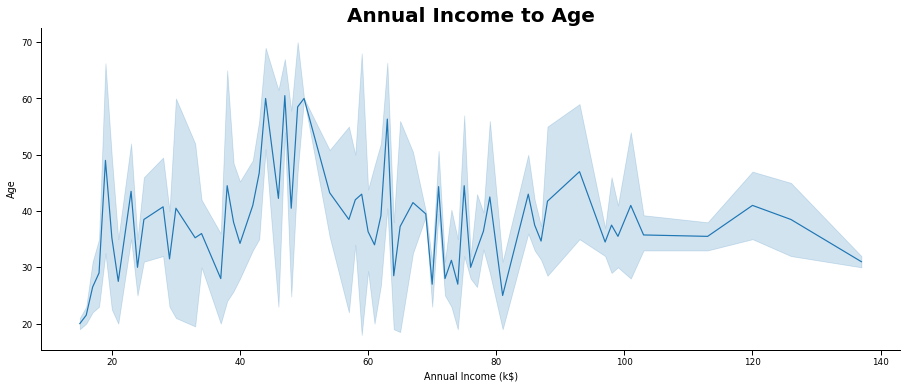

In [14]:
sns.set_context('paper')
sns.relplot(data=data,
            x="Annual Income (k$)",
            y="Age",
            aspect=2.5, 
            kind='line')
plt.title("Annual Income to Age", fontdict=titleDict)
plt.show()

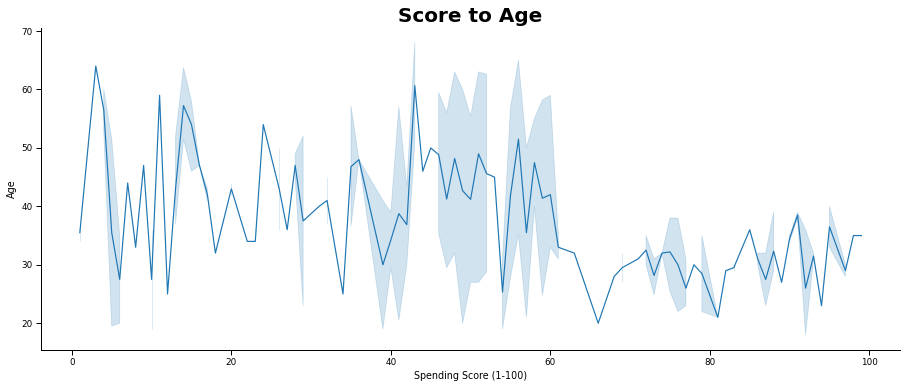

In [15]:
sns.set_context('paper')
sns.relplot(data=data,
            x="Spending Score (1-100)",
            y="Age",
            aspect=2.5, 
            kind='line')
plt.title("Score to Age", fontdict=titleDict)
plt.show()

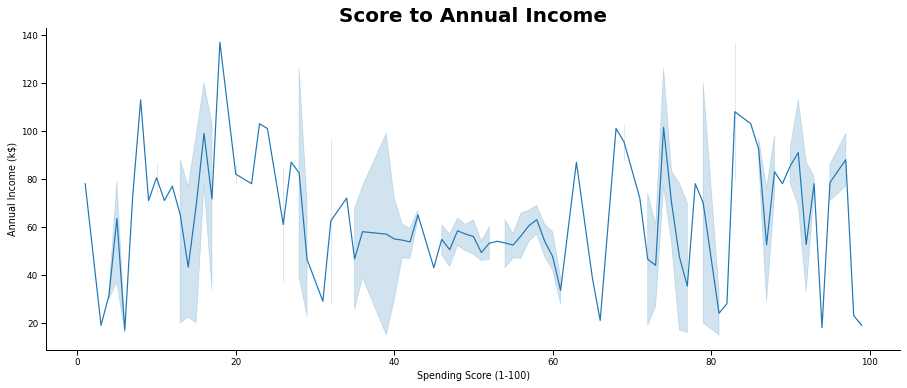

In [16]:
sns.set_context('paper')
sns.relplot(data=data,
            x="Spending Score (1-100)",
            y="Annual Income (k$)",
            aspect=2.5, 
            kind='line')
plt.title("Score to Annual Income", fontdict=titleDict)
plt.show()

# Dokonać niezbędnych zmian w bazie danych potrzebnych do rozpoczęcia
# procesu klasteryzacji (kolumna płeć i ID)

In [6]:
le = preprocessing.LabelEncoder()
new_name = le.fit_transform(data["Gender"])
data["Gender"] = new_name
data.drop(columns=["CustomerID"], inplace=True)

# Wygenerować macierz kowariancji i korelacji.

In [7]:
correlation = data.corr()
correlation.round(3).style.background_gradient()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.061000,0.056000,-0.058000
Age,0.061000,1.000000,-0.012000,-0.327000
Annual Income (k$),0.056000,-0.012000,1.000000,0.010000
Spending Score (1-100),-0.058000,-0.327000,0.010000,1.000000


In [8]:
covariance = data.cov()
covariance.round(3).style.background_gradient()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,0.248000,0.423000,0.737000,-0.747000
Age,0.423000,195.133000,-4.549000,-118.040000
Annual Income (k$),0.737000,-4.549000,689.836000,6.717000
Spending Score (1-100),-0.747000,-118.040000,6.717000,666.854000


# Dokonać klasteryzacji z użyciem algorytmu k-średnich dla k=5 z
# uwzględnieniem tylko dwóch kolumn (wybrać je na podstawie wyników
# macierzy kowariancji i korelacji).

In [9]:
# wybrałem spendingScore i Age ze względu na największy wynik w korelacji i największy w kowariancji
claster_without_PCA_data = data.iloc[0:, 1:4].drop(columns=["Annual Income (k$)"]).values
kmeans = KMeans(n_clusters=5, random_state=18)
kmeans.fit_transform(claster_without_PCA_data)
pass

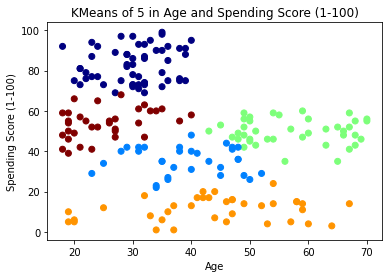

In [10]:
plt.scatter(claster_without_PCA_data[0:, 0],claster_without_PCA_data[0:, 1], c=kmeans.labels_, cmap="jet")
plt.title("KMeans of 5 in Age and Spending Score (1-100)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

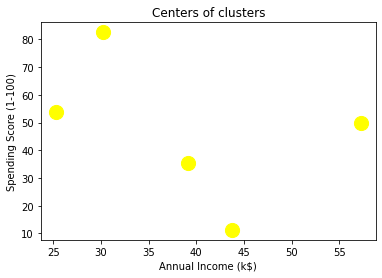

In [11]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label = 'Centroids')
plt.title('Centers of clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
KLASTERYZACJA Z PCA

# Która kolumna/kolumny przechowują najwięcej informacji ?

# Czy możemy zredukować do dwóch wymiarów przy pozostaniu na poziomie powyżej 80% wariancji?


In [26]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# Separating out the features
x = data.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
principalDf1 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca.explained_variance_ratio_.sum()

0.7757454566976748

# Nie można ponieważ nie wychodzi poza 80 procent

In [13]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf2 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(pca.explained_variance_ratio_.sum())

1.0


# Zawiera powyzej 80 procent wiec dzialamy na tych danych

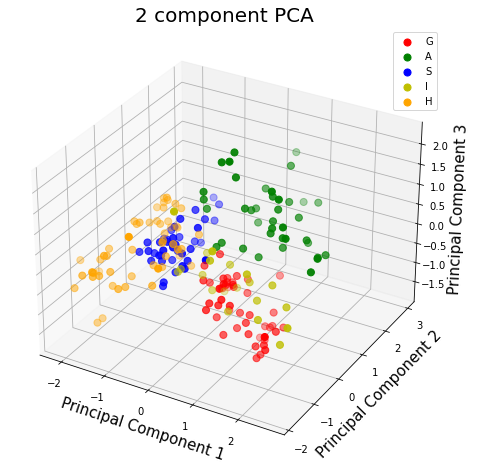

In [23]:
kmeans = KMeans(n_clusters=5, random_state=18)
km = kmeans.fit_predict(principalDf2)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1,projection="3d") 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['G', 'A', 'S', 'I', 'H']
colors = ['r', 'g', 'b', 'y', 'orange']
i = 0
for target, color in zip(targets,colors):
    ax.scatter(principalDf2.loc[km == i]['principal component 1']
               , principalDf2.loc[km == i]['principal component 2']
               , principalDf2.loc[km == i]['principal component 3']
               , c = color
               , s = 50)
    i += 1
ax.legend(targets)
ax.grid()

In [ ]:
ANALIZA

# Porównać wyniki klasteryzacji z użyciem PCA i bez

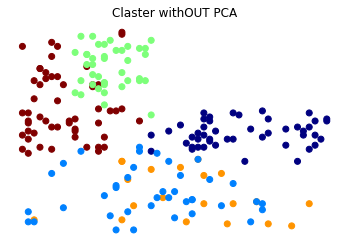

In [47]:
plt.scatter(claster_without_PCA_data[0:, 0],claster_without_PCA_data[0:, 1], c=kmeans.labels_, cmap="jet")
plt.title("Claster withOUT PCA")
plt.axis('off')
plt.show()

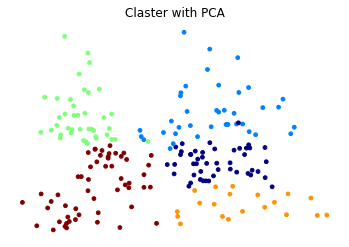

In [72]:
plt.scatter(principalDf[0], principalDf[1], c=kmeans.labels_, cmap='jet', s=14)
plt.title("Claster with PCA")
plt.axis('off')
plt.show()

## Klasteryzacja z PCA jest dużo wydajniejsza i dokładna od klasteryzacji bez PCA

# Opisać krótko każdą grupę nadając jej odpowiednią nazwę własną (np.
# klienci docelowi). Ocenić potencjał grup pod względem przyszłych wyników
# sprzedaży. Do kogo należy kierować najwięcej informacji marketingowych?

In [100]:
final_data = pd.concat([data, pd.DataFrame(data = km, columns=["Group_Predicted"])], axis=1)
grouped_final_data = final_data.groupby(["Group_Predicted"])
# grouped_final_data.mean().round()
print(grouped_final_data.get_group(0).mean().round())
print("---------------------------------------------")
print(grouped_final_data.get_group(1).mean().round())
print("---------------------------------------------")
print(grouped_final_data.get_group(2).mean().round())
print("---------------------------------------------")
print(grouped_final_data.get_group(3).mean().round())
print("---------------------------------------------")
print(grouped_final_data.get_group(4).mean().round())

Gender                     0.0
Age                       56.0
Annual Income (k$)        54.0
Spending Score (1-100)    49.0
Group_Predicted            0.0
dtype: float64
---------------------------------------------
Gender                     1.0
Age                       40.0
Annual Income (k$)        86.0
Spending Score (1-100)    19.0
Group_Predicted            1.0
dtype: float64
---------------------------------------------
Gender                     0.0
Age                       33.0
Annual Income (k$)        86.0
Spending Score (1-100)    82.0
Group_Predicted            2.0
dtype: float64
---------------------------------------------
Gender                     0.0
Age                       46.0
Annual Income (k$)        27.0
Spending Score (1-100)    18.0
Group_Predicted            3.0
dtype: float64
---------------------------------------------
Gender                     0.0
Age                       25.0
Annual Income (k$)        41.0
Spending Score (1-100)    62.0
Group_Predic

## Grupa 0  ---------- >  Starsi, średnio zarabiający (Nieistotna)
### Nie jest to dla nas istotna grupa ze względu na największy średni wiek 
## Grupa 1  ---------- >  Starsi, dobrze zarabiający (Istotna)
### Jest to grupa istotna dla nas pomimo dużego wieku średniego, nie jest on aż tak duży bo jedynie 40 lat, a ich zarobki wyglądają obiecująco
## Grupa 2  ---------- >  Młodzi, dobrze zarabiający (Grupa Focusowa)
### Jest to Grupa na której powinniśmy się skupić ze względu na to, że są w stanie dużo wydać oraz w młodym wieku kupuje się więcej nieprzydatnych przedmiotów.
## Grupa 3  ---------- >  Starsi, słabo zarabiający (Nieistotna)
### Nie jest to grupa istotna dla nas ze względu na bardzo małe zarobki.
## Grupa 4  ---------- >  Młodzi, słabo zarabiający (Nieistotna)
### Pomimo młodego wieku nie jest to istotna grupa ze względu na bardzo małe zarobki, które nie są dla nas satysfakcjonujące.

# Czy w poszczególnych grupach dominuje któraś z płci?

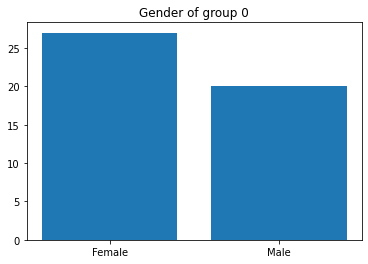

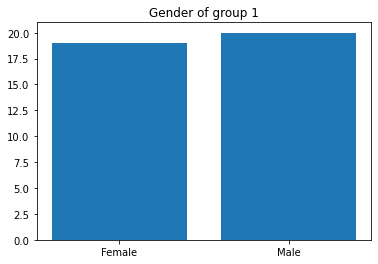

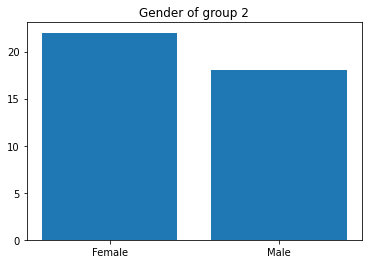

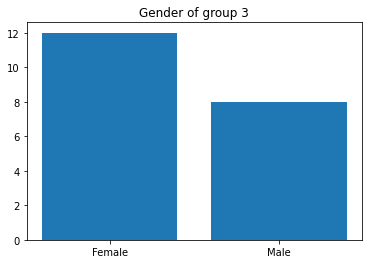

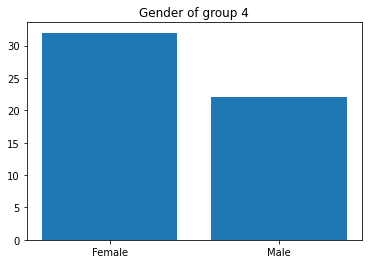

In [95]:
for i in range(5):
    plt.bar(["Female", "Male"], grouped_final_data.get_group(i).groupby(["Gender"]).size())
    plt.title("Gender of group " + str(i))
    plt.show()

## Wszędzie oprócz grupy pierwszej możemy zaobserwować dysproporcję w rodzaju płci na korzyść płci źeńskiej 

# Czy z wstępnej analizy danych wynikają jakieś widoczne zależności np.
# między wiekiem a oceną wydawania?

## Można zauważyć zależność pomiędzy SpendingScore i Age ze względu na największy wynik w korelacji i największy w kowariancji spośród parametrów